In [2]:
neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                               metric='minkowski', metric_params=None, n_jobs=1)

SyntaxError: invalid character in identifier (3075134275.py, line 1)

weights 是在进行分类判断时给最近邻附上的加权，默认的 'uniform' 是等权加权
还有 'distance' 选项是按照距离的倒数进行加权，也可以使用用户自己设置的其他加权方法。
举个例子：假如距离询问点最近的三个数据点中，有 1 个 A 类和 2 个 B 类，并且假设 A 类离询问点非常近，而两个 B 类距离则稍远。
在等权加权中，数量占优势，KNN 会判断问题点为 B 类；
而如果使用距离加权，那么 A 类有更高的权重（因为更近），如果它的权重高于两个 B 类的权重的总和，那么算法会判断问题点为 A 类。
权重功能的选项应该视应用的场景而定。

algorithm 是分类时采取的算法
有 'brute'、'kd_tree' 和 'ball_tree'。
brute 则是最直接的蛮力计算。根据样本量的大小和特征的维度数量，不同的算法有各自的优势。
默认的 'auto' 选项会在学习时自动选择最合适的算法，所以一般来讲选择 auto 就可以。

leaf_size 是 kd_tree 或 ball_tree 生成的树的树叶（树叶就是二叉树中没有分枝的节点）的大小。
在 kd 树文章中我们所有的二叉树的叶子中都只有一个数据点，但实际上树叶中可以有多于一个的数据点，算法在达到叶子时在其中执行蛮力计算即可。对于很多使用场景来说，叶子的大小并不是很重要，我们设 leaf_size=1 就好。

metric 和 p，是我们在 kNN 入门文章中介绍过的距离函数的选项，一般来讲，默认的 metric='minkowski'（默认）和 p=2（默认）就可以满足大部分需求。

n_jobs 是并行计算的线程数量，默认是 1，输入 -1 则设为 CPU 的内核数。

In [14]:
import random
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [10]:
# 随机生成 6 组 200 个的正态分布
x1 = [random.normalvariate(50, 6) for i in range(200)]
y1 = [random.normalvariate(5, 0.5) for i in range(200)]

x2 = [random.normalvariate(30, 6) for i in range(200)]
y2 = [random.normalvariate(4, 0.5) for i in range(200)]

x3 = [random.normalvariate(45, 6) for i in range(200)]
y3 = [random.normalvariate(2.5, 0.5) for i in range(200)]

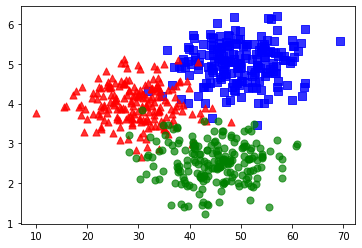

In [15]:
plt.scatter(x1,y1,c='b',marker='s',s=50,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=50, alpha=0.8)
plt.scatter(x3,y3, c='g', s=50, alpha=0.7)

In [54]:
# 把所有的 x 坐标和 y 坐标放在一起
x_val = np.concatenate((x1,x2,x3))
y_val = np.concatenate((y1,y2,y3))
# 计算距离的归一化
x_diff = max(x_val)-min(x_val)
y_diff = max(y_val)-min(y_val)

x_normalized = np.array(x_val) / x_diff
y_normalized = np.array((y_val)) / y_diff
xy_normalized = np.array((x_normalized, y_normalized))

# 生成标签
labels = [1]*200+[2]*200+[3]*200

In [55]:
clf = neighbors.KNeighborsClassifier(30)
clf.fit(xy_normalized, labels)

ValueError: Found input variables with inconsistent numbers of samples: [2, 600]

In [56]:
x_normalized.shape, y_normalized.shape, xy_normalized.shape


((600,), (600,), (2, 600))

In [46]:
a = np.array([[1,2,30],[10,15,4]])
b = np.array([[1,2,3],[12, 19, 29]])
np.vstack((a,b)).shape, np.hstack((a,b)).shape

((4, 3), (2, 6))